<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Introduction to Computation for the Social Sciences</h1>
<h2 style="margin-top: 0.7em; margin-bottom: 0.3em;">Assignment 2</h2>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline: Dec 1, 23:59</h3>

</div>
<br>

<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">
Please push your solutions to your personal repository in our <a href='https://classroom.github.com/a/tGD_7t85'>GitHub Classroom</a></h4><br>

***

In this assignment, we want to investigate potential network-structures among the Eurovision Song Contest.

The Eurovision Song Contest is a yearly song contest between european countries. 
Each country can send one representative, performing a music act. 
The winner is determined by a voting system, where a countries inhabitants can vote for *other* countries musicians. 
Based on the number of calls from a certain country to a certain country, points (ranging between 0 and 12) are awarded.

These final points determine the winner of the current year.

<h1>Part 1 - Scrape Eurovision Data from Wikipedia</h1>


<h3>Task 1 - Scrape the years 2010 - 2013 using Beautiful Soup</h3>

In this task, you are supposed to scrape the results from the Eurovision Song Contest for the following years: [2010](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2010), [2011](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2011), [2012](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2012), [2013](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2013). We selected these years, because for them the html-code is (mostly) of the same structure. This way, you can reuse your code. 

- We are interested in the assigned points in the final, which can be found in the table named something like *'Detailed voting results of the final'*. (be careful, this name might be slightly different for one or more of the years. Please write your code to match all options)
- Try to write the code for scraping in a *convenient way* (meaning try not to copy and paste stuff for each year...)


***Important***: We want you to scrape the resulting tables by using Beautiful Soup and html-tags and html-attributes. Please **do not use** the `pd.read_html()` function.


***a) Investigate the underlying html structure of the wikipedia pages. Where can you find the table of interest? How could you filter for it?***

Access and request the wikipedia page. Deal with the response in a suitable way and filter for the html-code, reffering to our table of interest.

*Hint:* One way to select the desired table is to use the tables caption and the `.parent` function.

In [1]:
# import required packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
# Scrape and filter for the table
url = "https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2010"

headers = {"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0"}

resp = requests.get(url, headers = headers)
print(resp) # printing one response to see if it works 

soup = BeautifulSoup(resp.content, 'html.parser')

# I tried using the caption with .parent, but could not figure how i can access specificially that caption
# I worked around with the next sibling of the captions which I could acces directly and than I double the parent function to get the table
table = soup.find(id="cite_ref-86").parent.parent
table

<Response [200]>


<table class="wikitable plainrowheaders" style="text-align:center; font-size:85%;">
<caption>Detailed voting results of the final<sup class="reference" id="cite_ref-85"><a href="#cite_note-85"><span class="cite-bracket">[</span>81<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-86"><a href="#cite_note-86"><span class="cite-bracket">[</span>82<span class="cite-bracket">]</span></a></sup>
</caption>
<tbody><tr>
<th colspan="2">
</th>
<th class="nowrap ts-vertical-header is-normal" scope="col" style=""><div style=""><link href="mw-data:TemplateStyles:r1221560606" rel="mw-deduplicated-inline-style"/>Total score</div>
</th>
<th class="nowrap ts-vertical-header is-normal" scope="col" style=""><div style=""><link href="mw-data:TemplateStyles:r1221560606" rel="mw-deduplicated-inline-style"/>Romania</div>
</th>
<th class="nowrap ts-vertical-header is-normal" scope="col" style=""><div style=""><link href="mw-data:TemplateStyles:r1221560606" rel="mw-deduplicated-in

***b) Scrape the content of the table***

Once you restricted the response to the code of the table, start filtering out it's content. 

*Hint:* It might make sense to scrape the table using single lists/vectors for certain information and later recombine these into a data frame of the right format. 

In [3]:
# Scrape for one year 2010
# the columns, rows and points were scraped seperately and store in lists

column = []
for country in table.find_all("div"):
    column.append(country.text)

rows = []
for länd in table.find_all("th", scope = "row"):
    rows.append(länd.text.strip())

points = []
for point in table.find_all("td"):
    points.append(point.text.strip())

# if points were empty I added a zero
for i in range(len(points)):
    if points[i] == "":
        points[i] = str(0)

# to get the points list in a data frame we split the list in multiple lists every 40 assinged points
# each new list represents one row of points for the contestants
chunks = [points[x:x+40] for x in range(0, len(points), 40)]

# since we scrape the contestants table headline as column we need to remove it from the list to have matching lists for creating the dataframe
elm = column.pop()

euro2010 = pd.DataFrame(chunks, columns=column, index=rows)
euro2010

,Total score,Romania,Ireland,Germany,Serbia,Albania,Turkey,Croatia,Poland,Bosnia and Herzegovina,...,Switzerland,Belgium,United Kingdom,Netherlands,Israel,Macedonia,Moldova,Georgia,Sweden,Armenia
Azerbaijan,145,0,3,0,0,0,12,0,8,7,...,2,5,0,0,7,3,7,8,0,0
Spain,68,2,0,0,0,7,0,0,0,0,...,0,1,0,0,1,0,4,2,0,7
Norway,35,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,4,2
Moldova,27,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Cyprus,27,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,3,0
Bosnia and Herzegovina,51,0,0,0,12,6,8,10,0,0,...,0,0,0,0,0,6,0,0,0,0
Belgium,143,4,10,12,5,0,0,0,10,0,...,7,0,0,6,0,0,0,0,2,0
Serbia,72,0,0,5,0,3,0,8,0,12,...,10,0,0,1,0,7,0,0,7,0
Belarus,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,0,0
Ireland,25,0,0,2,0,0,0,1,0,0,...,6,0,7,0,6,0,0,0,0,0


***c) Reuse your code conveniently to scrape not only one year, but the four years (2010 - 2013) into single data frames.***

If you'd like to, you can additionally export the data frames as separate csv-files.

In [4]:
# reusing the code, I wrote before to create to functions
# one function for the table in html format 
# the other function to access the html data and create a pandas frame of that

def get_table(url, headers,cite):
    
    """
    This Function is used to get a table in html format from Wikipedia.

    Parameters
    ----------
    url: enter the url from the page which should be scraped
    
    headers: user agent

    cite: rnumber of the citation referenz in the html-code where the table to scrape is
    
    Returns
    -------
    html code 

    """
    
    response = requests.get(url, headers = headers)

    soup = BeautifulSoup(response.content, "html.parser")

    cite = cite
    
    html_table = soup.find(id=f"cite_ref-{cite}").parent.parent

    return html_table


def scrape_table(data):
    
    """
    This function takes a given html table and creates a pandas dataframe of the given data

    Parameters
    ---------
    data: Table in html format. Use get_table to get the right format

    Returns
    -------
    pandas data frame

    """
    countries_column = []
    countries_rows = []
    countries_points = []

    for i in data.find_all("div"):
        countries_column.append(i.text.strip())

    for x in data.find_all("th", scope = "row"):
        countries_rows.append(x.text.strip())

    for point in data.find_all("td"):
        countries_points.append(point.text.strip())

    for i in range(len(countries_points)):
        if countries_points[i] == "":
            countries_points[i] = str(0)

    chunks = [countries_points[x:x+len(countries_column)-1] for x in range(0, len(countries_points), len(countries_column)-1)]

    elm = countries_column.pop()

    table = pd.DataFrame(chunks, columns=countries_column, index=countries_rows)
    return table






In [5]:
#testing functions

html_table = get_table("https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2012", headers=headers, cite=86)

euro2012_scores = scrape_table(html_table)

<h3>Task 2 - Scrape information on each years aritsts using the 'read_html()' function.</h3>

Now, you may use `pd.read_html()` to retreive the tables containing information on each countries artist, their song etc. These tables are called "Participants of the Eurovision Song Contest 20xx"

Store them in separate data frames and make sure to modify them into suitable data types and format.

In [6]:
# In my opinion these tables have suitable data types and formats which is why i dont see the urgency to change them
# the columns for songwriters is the only which isnt that great but since we dont have to work with that any further I leave them as is

singer_euro_10 = pd.read_html("https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2010", match="Participants of the Eurovision Song Contest")[0]
singer_euro_10

singer_euro_11 = pd.read_html("https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2011", match="Participants of the Eurovision Song Contest")[0]
singer_euro_11

singer_euro_12 = pd.read_html("https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2012", match="Participants of the Eurovision Song Contest")[0]
singer_euro_12

singer_euro_13 = pd.read_html("https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2013", match="Participants of the Eurovision Song Contest")[0]
singer_euro_13




,Country,Broadcaster,Artist,Song,Language,Songwriter(s)
0,Albania,RTSH,Adrian Lulgjuraj and Bledar Sejko,"""Identitet""",Albanian,Bledar SejkoEda Sejko
1,Armenia,AMPTV,Dorians,"""Lonely Planet""",English,Tony IommiVardan Zadoyan
2,Austria,ORF,Natália Kelly,"""Shine""",English,Andreas GrassAlexander KahrNatália KellyNikola...
3,Azerbaijan,İTV,Farid Mammadov,"""Hold Me""",English,John BallardRalph CharlieDimitris Kontopoulos
4,Belarus,BTRC,Alyona Lanskaya,"""Solayoh""",English,Martin KingMarc Paelinck
5,Belgium,RTBF,Roberto Bellarosa,"""Love Kills""",English,Jukka ImmonenIain James
6,Bulgaria,BNT,Elitsa Todorova and Stoyan Yankoulov,"""Samo shampioni"" (Само шампиони)",Bulgarian,Kristian TalevElitsa Todorova
7,Croatia,HRT,Klapa s Mora,"""Mižerja""",Croatian,Goran Topolovac
8,Cyprus,CyBC,Despina Olympiou,"""An me thimasai"" (Aν με θυμάσαι)",Greek,Andreas GiorgallisZenon Zindilis
9,Denmark,DR,Emmelie de Forest,"""Only Teardrops""",English,Lise CabbleJulia Fabrin JakobsenThomas Stengaard


***

<h1>Part 2 - Get data from an API</h1>



To extend our analysis, we would now like you to retreive data from the Wikipedia API.

For every artist competing in one year (you can choose one year between 2010-2013 yourself), we want to get the date, their wikipedia page was created. Using these dates we want to explore the hypothesis that the earlier an artist's wikipedia page was created - i.e. the more popular he/she already was prior to the Contest - the more points the country got.

<h3>Task 3 - Retreive Data from the <a href='https://xtools.wmcloud.org/api#/'>XTools Wikipedia-API</a></h3>

***a) Access the API via the correct `GET request` and retrieve the creation date of each artist's wikipedia page.***

You can use the sandbox available at https://xtools.wmcloud.org/api#/ for testing which GET request you need and how it works.

In [7]:
# Solution for euro 2012
# blueprint on how to access the information we are interested in
artist = "Joan_Franka"
xtools = requests.get(f"https://xtools.wmcloud.org/api/page/pageinfo/en.wikipedia.org/{artist}?format=json")
Joan = xtools.json()
Joan["created_at"]


# basically use df euro_2012 from the task before, replace whitespaces in the artist with underscore
singer_euro_12["Artist"] = singer_euro_12["Artist"].replace(" ","_",regex=True)

# careful with special cases and naming issues, handle special cases manually 
singer_euro_12["Artist"] = singer_euro_12["Artist"].replace("Greta_Salóme_and_Jónsi","Greta_Salóme_Stefánsdóttir",regex=True)
singer_euro_12["Artist"] = singer_euro_12["Artist"].replace("Gaitana","Gaitana_(singer)",regex=True)
singer_euro_12["Artist"] = singer_euro_12["Artist"].replace("Engelbert_Humperdinck","Engelbert_Humperdinck_(singer)",regex=True)
singer_euro_12["Artist"] = singer_euro_12["Artist"].replace("Pasha_Parfeny","Pasha_Parfeni",regex=True)
singer_euro_12["Artist"] = singer_euro_12["Artist"].replace("Mandinga","Mandinga_(band)",regex=True)
singer_euro_12["Artist"] = singer_euro_12["Artist"].replace("Izabo","Cherie_and_Renno",regex=True)


# use a f string to insert the artist name in the link and iterate over the artist column in the dataframe
# access created_at in the json file
wiki_create = []
for i in singer_euro_12["Artist"]:
    xtools = requests.get(f"https://xtools.wmcloud.org/api/page/pageinfo/en.wikipedia.org/{i}?format=json")
    page = xtools.json()
    date = page["created_at"]
    wiki_create.append(date)
wiki_create


['2011-05-27T13:54:30Z',
 '2012-02-24T23:49:43Z',
 '2012-02-12T20:01:50Z',
 '2012-02-24T15:26:25Z',
 '2002-01-27T15:55:46Z',
 '2010-01-17T04:21:08Z',
 '2006-07-19T13:05:18Z',
 '2005-08-29T16:44:01Z',
 '2009-12-27T11:26:56Z',
 '2012-01-06T19:44:11Z',
 '2009-12-20T22:17:47Z',
 '2009-06-12T20:08:29Z',
 '2004-12-30T22:21:43Z',
 '2012-02-19T16:40:24Z',
 '2012-02-06T16:40:20Z',
 '2010-03-27T18:46:46Z',
 '2010-05-04T13:41:36Z',
 '2012-02-11T22:51:52Z',
 '2009-11-02T13:01:05Z',
 '2005-08-28T20:03:11Z',
 '2012-02-19T00:25:01Z',
 '2012-02-18T19:49:09Z',
 '2012-03-03T21:30:51Z',
 '2006-07-01T00:40:47Z',
 '2012-02-04T23:46:27Z',
 '2012-03-12T18:54:21Z',
 '2004-08-20T12:28:07Z',
 '2012-02-26T21:06:48Z',
 '2012-02-04T00:53:42Z',
 '2012-03-11T00:41:40Z',
 '2012-03-10T22:42:36Z',
 '2012-03-07T20:57:21Z',
 '2012-03-14T12:15:04Z',
 '2004-12-01T10:10:58Z',
 '2020-08-06T15:00:54Z',
 '2012-02-26T21:45:23Z',
 '2007-07-16T09:13:50Z',
 '2011-06-24T09:04:38Z',
 '2011-12-10T21:53:35Z',
 '2012-01-09T15:33:41Z',


In [8]:
# add it to existing dataframe
singer_euro_12 = singer_euro_12.assign(artists_page_creation = wiki_create)

# changing this df because we merge it and need a column named country
euro2012_scores = euro2012_scores.reset_index()
euro2012_scores = euro2012_scores.rename(columns={"index":"Country"})

# creating a new df, merging scores and singer df
singer_euro_12_with_score = pd.merge(singer_euro_12,euro2012_scores,how="left")


# changing data type and creating timestamp for better visualisation later on
singer_euro_12_with_score["Timestamp"] = pd.to_datetime(singer_euro_12_with_score["artists_page_creation"])
singer_euro_12_with_score["Total score"] = pd.to_numeric(singer_euro_12_with_score["Total score"])


***b) Investigate if there exists a relationship between the creation date and the voting result.***

Does the hypothesis, that artists whose Wikipedia page is created earlier ahead of the contest recieve higher scores, hold for your year? Create some nice visualization to back your findings!<br>
Did you encounter any problems with your approach? If yes, name them and shortly explain their impact on your analysis.

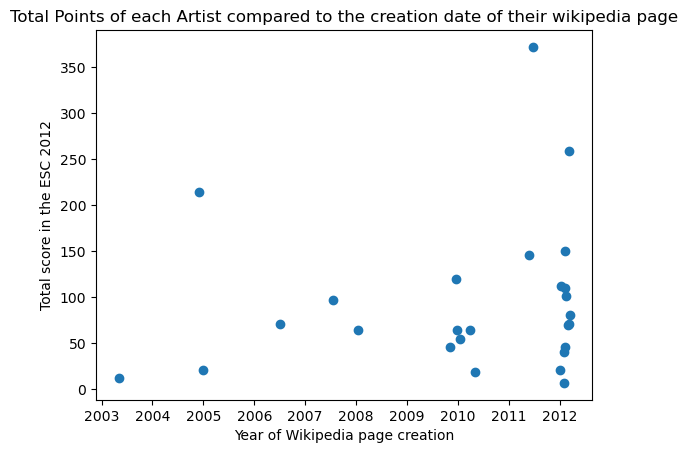

0.22374278244653217

In [9]:
# plotting using a scatter plot to visualize the data
plt.scatter(data=singer_euro_12_with_score, x="Timestamp", y="Total score")
plt.xlabel("Year of Wikipedia page creation")
plt.ylabel("Total score in the ESC 2012")
plt.title("Total Points of each Artist compared to the creation date of their wikipedia page")
plt.show()

# calculating a correlation. It shows us the connection between our two variables. The result shows us a low correlation between
# creation of the wikipedia page and the points the respective artist achived
corr = singer_euro_12_with_score["Timestamp"].corr(singer_euro_12_with_score["Total score"], method="spearman")
corr

# no the hypothesis that artist whose wikipedia page was created earlier receive hgiher scores does not hold for the year 2012!

Problems:
- biggest issue were the names of the artists. Checking and changing the names manually is not really a clean and nice approach, but it worked in this case.

***

<h1>Part 3 - Network Visualization</h1>


<h4>Task 4 - Vizualize the results in a network graph.</h4>

Choose one of the years you scraped above (i.e. the year, for which you also got the artist-data) and visualize the voting results in a network plot. Play around with different layouts and mappings (for example: how do you indicate contestants vs. only voters, how could you visualize the overall points a country got, how can you display the assigned points?).

*Hint:* It makes sense to restrict your plot on i.e. only the three highest points (8, 10, 12) to prevent it from becoming too cluttered.

***a) Familiarize with Graphs***

Extract i.e. the entities being mapped to the nodes and the entities being mapped to edges, etc.

In [10]:
# creating a df with all countries to use them as the nodes in the networks
all_countries = pd.merge(singer_euro_12,euro2012_scores, how="outer")

#filling NAs with zeros and changing it to numeric, because we need it later for the node_size
all_countries["Total score"] = all_countries["Total score"].fillna(0)
all_countries["Total score"] = pd.to_numeric(all_countries["Total score"])


In [11]:
# creating a list which serves as the nodes
vertices = []

for row in range(0, len(all_countries)):

    country = all_countries["Country"].iloc[row]
    total_score = all_countries["Total score"].iloc[row]

    vertices.append((country, {'Total score' : total_score}))

# creating a second list which stores the node size for each node, adding 300, since its the standard size
vertices_size = []
for node in vertices:
    vertices_size.append(node[1]["Total score"]+300)



In [12]:
# deleting the total score variable and converting the dataframe to a dictionary
euro2012_scores = euro2012_scores.drop(columns="Total score")
euros_dict = euro2012_scores.set_index("Country").T.to_dict()

# for loop to iterate over the different keys and values in the dictionary and storing it only if their score is over or equal to 8
network = []
for contestant, voter in euros_dict.items():
    for voters, score in voter.items():
        if int(score) >= 8:
            network.append((voters,contestant, {"label": int(score)}))

# needed for coloring the nodes later on
finalist = []
for i in euro2012_scores["Country"]:
    finalist.append(i)

***b) Vizualize your choosen year***


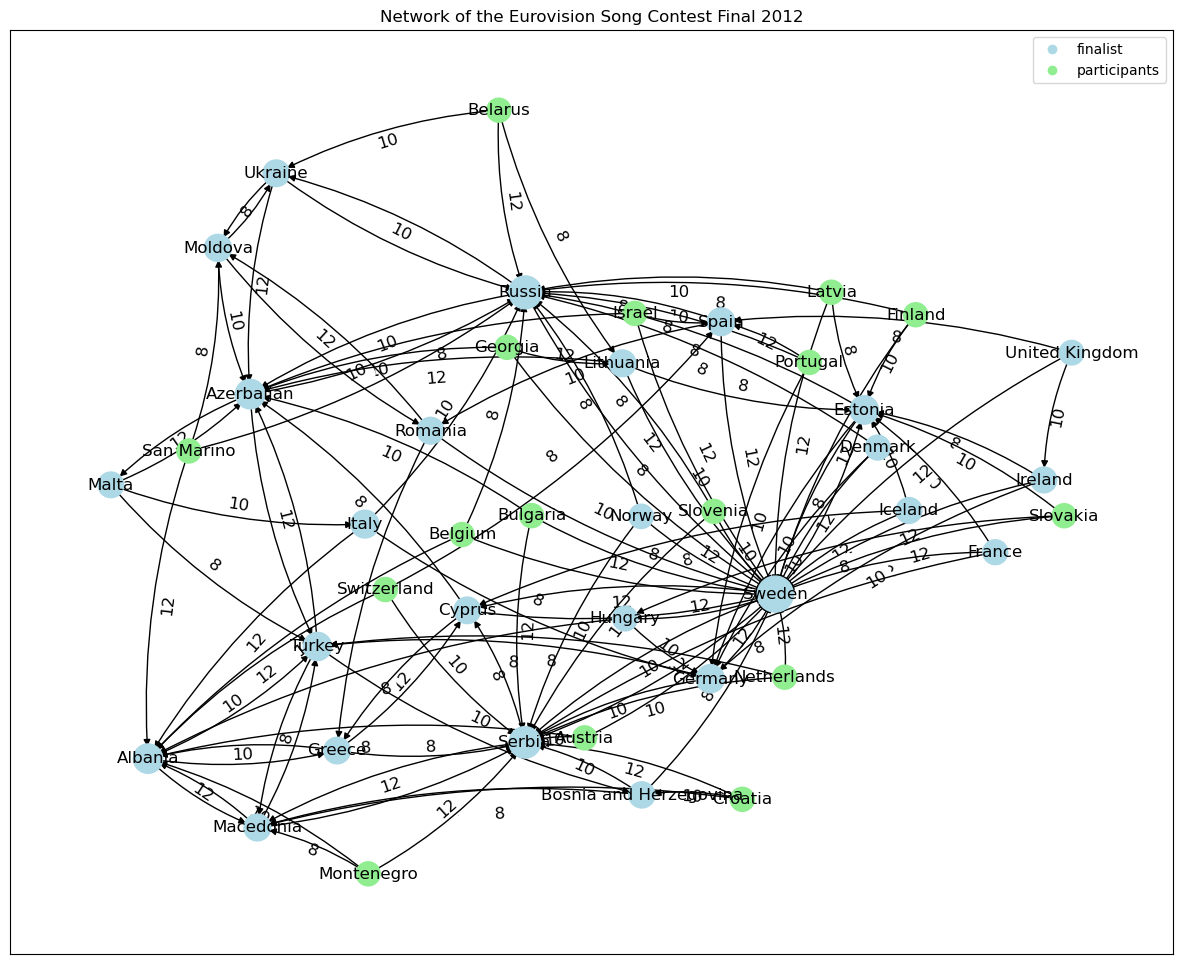

In [13]:
# creating a directed graph G
G = nx.DiGraph()
G.add_nodes_from(vertices)
G.add_edges_from(network)

edge_labels = dict([((p1, p2), a['label']) for p1, p2, a in G.edges(data=True)])

layout = nx.spring_layout(G, weight="label", scale=1)

# here we need the finalist list to determine which color each finalist and each participant gets
color = []
for node in G.nodes:
    if node in finalist:
        color.append("lightblue")
    else:
        color.append("lightgreen")

#legend with lightblue for finalist and lightgreen for the Participants
markers = [plt.Line2D([0,0],[0,0], color="lightblue", label="finalist", marker='o', linestyle=''),
           plt.Line2D([0,0],[0,0], color="lightgreen", label="participants", marker="o",linestyle="")]

# drawing the graph
plt.figure(1,figsize=(15,12))
plt.title("Network of the Eurovision Song Contest Final 2012")
plt.legend(markers, ["finalist", "participants"], numpoints=1, loc = 'upper right')
nx.draw_networkx_edge_labels(G, pos = layout, edge_labels = edge_labels, font_size=12)
nx.draw_networkx_edges(G, pos=layout, connectionstyle="arc3, rad=0.1")
nx.draw_networkx_nodes(G, node_color=color, pos=layout, node_size=vertices_size)
nx.draw_networkx_labels(G, pos=layout)
plt.show()

***

<h1>Part 4 - Bonus</h1>


Unfortunately, the network plots for single years of the Eurovision Songcontest are not too revealing...

This might change, if we aggregate data from several years. Then, we might be able to actually detect communities of countries within the data. That's what we would like you to investigate now.

In the GitHib folder, we provided you Eurovision vote results from 10 years (2010 - 2020). 

***a) Import the data files***

Import the csv-files and aggregate the data by taking i.e. the sum or average of points a county A (in columns) assigned a country B (the rows) over the years. 



In [14]:
# reading the data, grouping it and only using the important columns 
eurovision = pd.read_csv("data_10_years.csv")
eurovision = eurovision.groupby("Contestants").agg("sum").reset_index()
eurovision = eurovision.drop(columns=["Unnamed: 0", "Unnamed: 1","Jury score", "Televoting score"])

# as above creating a list of nodes
nodes = []
for row in range(0, len(eurovision)):
    country = eurovision["Contestants"].iloc[row]
    total_score = eurovision["Total score"].iloc[row]
    nodes.append((country, {'Total score' : total_score}))

# creating node_size based on the total points the countries got
node_size = []
for points in nodes:
    node_size.append(int(points[1]["Total score"]))


In [15]:
# deleting total score and creating a dict, as above
eurovision = eurovision.drop(columns="Total score")
eurovision_dict = eurovision.set_index("Contestants").T.to_dict()

# creating the edges but only if the score is over 30 
network_all = []
for contestant, voter in eurovision_dict.items():
    for voters, score in voter.items():
        if int(score) >= 30:
            network_all.append((voters, contestant, {"label" : int(score)}))

# coloring the edges depending on the score the country assigned them over the years
edge_color = []
for edge in network_all:
    if 0 < edge[2]["label"] < 45:
        edge_color.append("orange")
    elif 46 < edge[2]["label"] < 65:
        edge_color.append("blue")
    elif 66 < edge[2]["label"] <= 100:
        edge_color.append("green")
    else:
        edge_color.append("magenta")

***b) Visualize the result***

Visualize these aggregated scores in a network plot. The layout type `kamada_kawai_layout` is suitable for detecting communities. Make sure to weight edges by the assigned number of points.

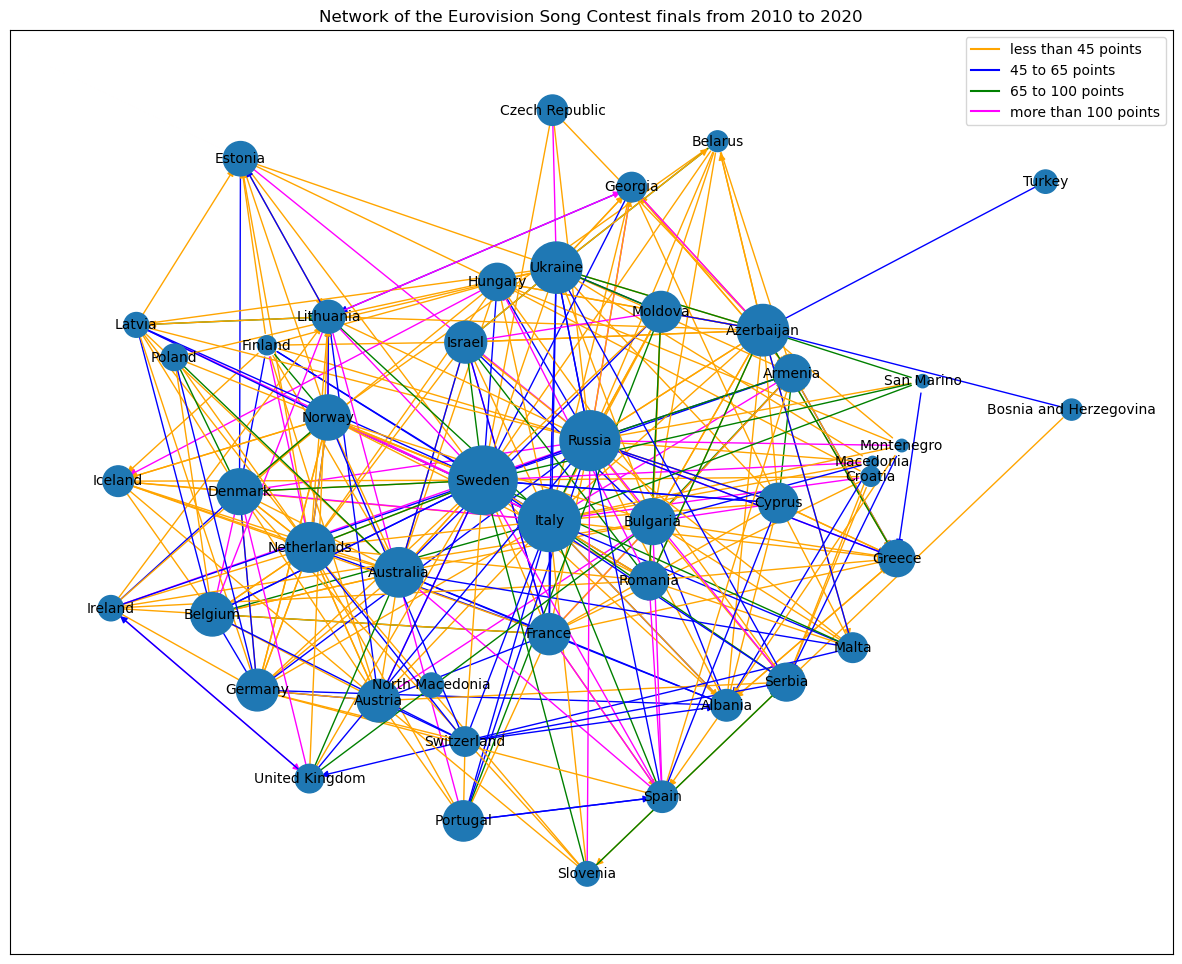

In [16]:
N = nx.DiGraph()

N.add_nodes_from(nodes)
N.add_edges_from(network_all)


layout = nx.kamada_kawai_layout(N, scale=1)

labels = dict([((p1, p2), a['label']) for p1, p2, a in N.edges(data=True)])

# creating legend manually
legende = [plt.Line2D([0,0],[0,0], color="orange", label="less than 45 points", marker='', linestyle="solid"),
           plt.Line2D([0,0],[0,0], color="blue", label="45 to 65 points", marker="",linestyle="solid"),
           plt.Line2D([0,0],[0,0], color="green", label="65 to 100 points", marker="",linestyle="solid"),
           plt.Line2D([0,0],[0,0], color="magenta", label="more than 75 points", marker="",linestyle="solid")]


plt.figure(1,figsize=(15,12))
plt.title("Network of the Eurovision Song Contest finals from 2010 to 2020")
plt.legend(legende, ["less than 45 points", "45 to 65 points", "65 to 100 points", "more than 100 points"], numpoints=1, loc = 'upper right')
nx.draw_networkx_edges(N, pos=layout, edge_color=edge_color)
nx.draw_networkx_nodes(N, pos=layout, node_size=node_size)
nx.draw_networkx_labels(N, pos=layout, font_size=10)
plt.show()

***c) Interprete your findings***

Interprete your plot. Could you detect something?

- sweden russia and italy received the most points over the years 2010-2020.
- accumulated over the years mostly less than 45 points were given to another country, that are all the orange edges
- we see a lot more blue, magenta and green edges going to the three countries with the highest points.
- when a country gets has a blue line (e.g. from portugal to spain), then it means that spain got over the last ten years between 45-65 points from portugal
- when the node is bigger than the country got overall more total points than a country with a small node
- smaller nodes are also far away from the middle of the network, bigger nodes are more drawn to the middle
- the more edges a country receives the more points it got overall